In [1]:
import talib
import pandas as pd
import connectorx as cx
import numpy as np
from importlib import reload

In [2]:
import datafunc; reload(datafunc)
from datafunc import *

In [3]:
vars = ['ticker', 'date', 'close', 'volume']
df = get_top_stocks_cx(5000, since='2020-01-01', vars=vars)

In [4]:
df['mdiff'] = 1 -  add_ma_diff(df, 252)

In [8]:
df['score'] = add_score(df, ['mdiff', 'volume'])

In [9]:
now = df[df.date == df.date.max()].copy()

In [23]:
smci = df[df.ticker=='SMCI']

In [24]:
smci[smci['date'].between('2024-09-15', '2024-09-31')]

,ticker,date,close,volume,ma252,ma252_low,ma252_high,mdiff,score
5004165,SMCI,2024-09-16,449.100,4262617.0,608.184623,26.718849,608.184623,0.956068,0.951498
5010818,SMCI,2024-09-17,439.380,3641980.0,608.939067,26.718849,608.939067,0.956122,0.943654
5017298,SMCI,2024-09-18,436.880,5753838.0,609.703274,26.718849,609.703274,0.956177,0.964047
5021405,SMCI,2024-09-19,437.200,4918673.0,610.455099,26.718849,610.455099,0.956231,0.957865
5027941,SMCI,2024-09-20,45.727,75498350.0,609.671992,26.718849,610.455099,0.956231,0.997201
5032480,SMCI,2024-09-23,46.594,71504200.0,608.938079,26.718849,610.455099,0.956231,0.997109
5033224,SMCI,2024-09-24,46.361,53395050.0,608.186536,26.718849,610.455099,0.956231,0.996428
5040403,SMCI,2024-09-25,45.815,49938580.0,607.380802,26.718849,610.455099,0.956231,0.996216
5044601,SMCI,2024-09-26,40.240,238540920.0,606.551556,26.718849,610.455099,0.956231,0.997993
5050470,SMCI,2024-09-27,41.974,107308210.0,605.696135,26.718849,610.455099,0.956231,0.997640


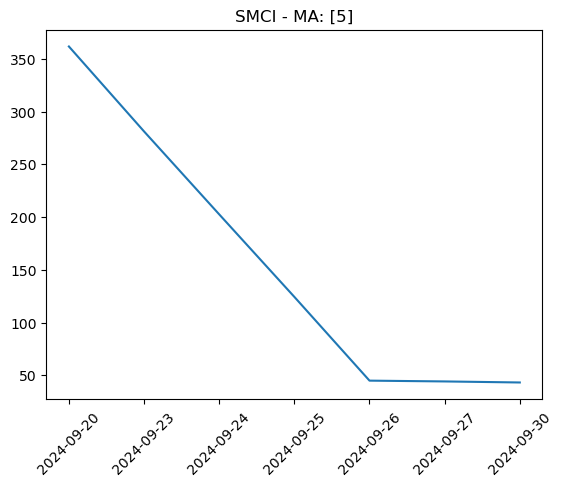

In [20]:
plot(df[df['date'].between('2024-09-15', '2024-09-31')], 'smci')

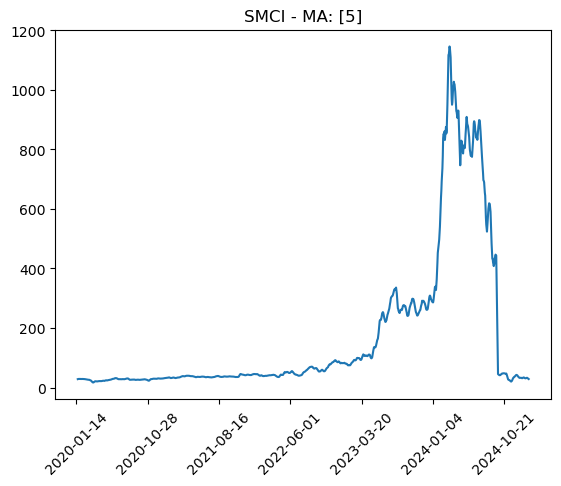

In [12]:
plot(df, 'smci')

In [10]:
tlist = list(now.nlargest(12, 'score')['ticker'])

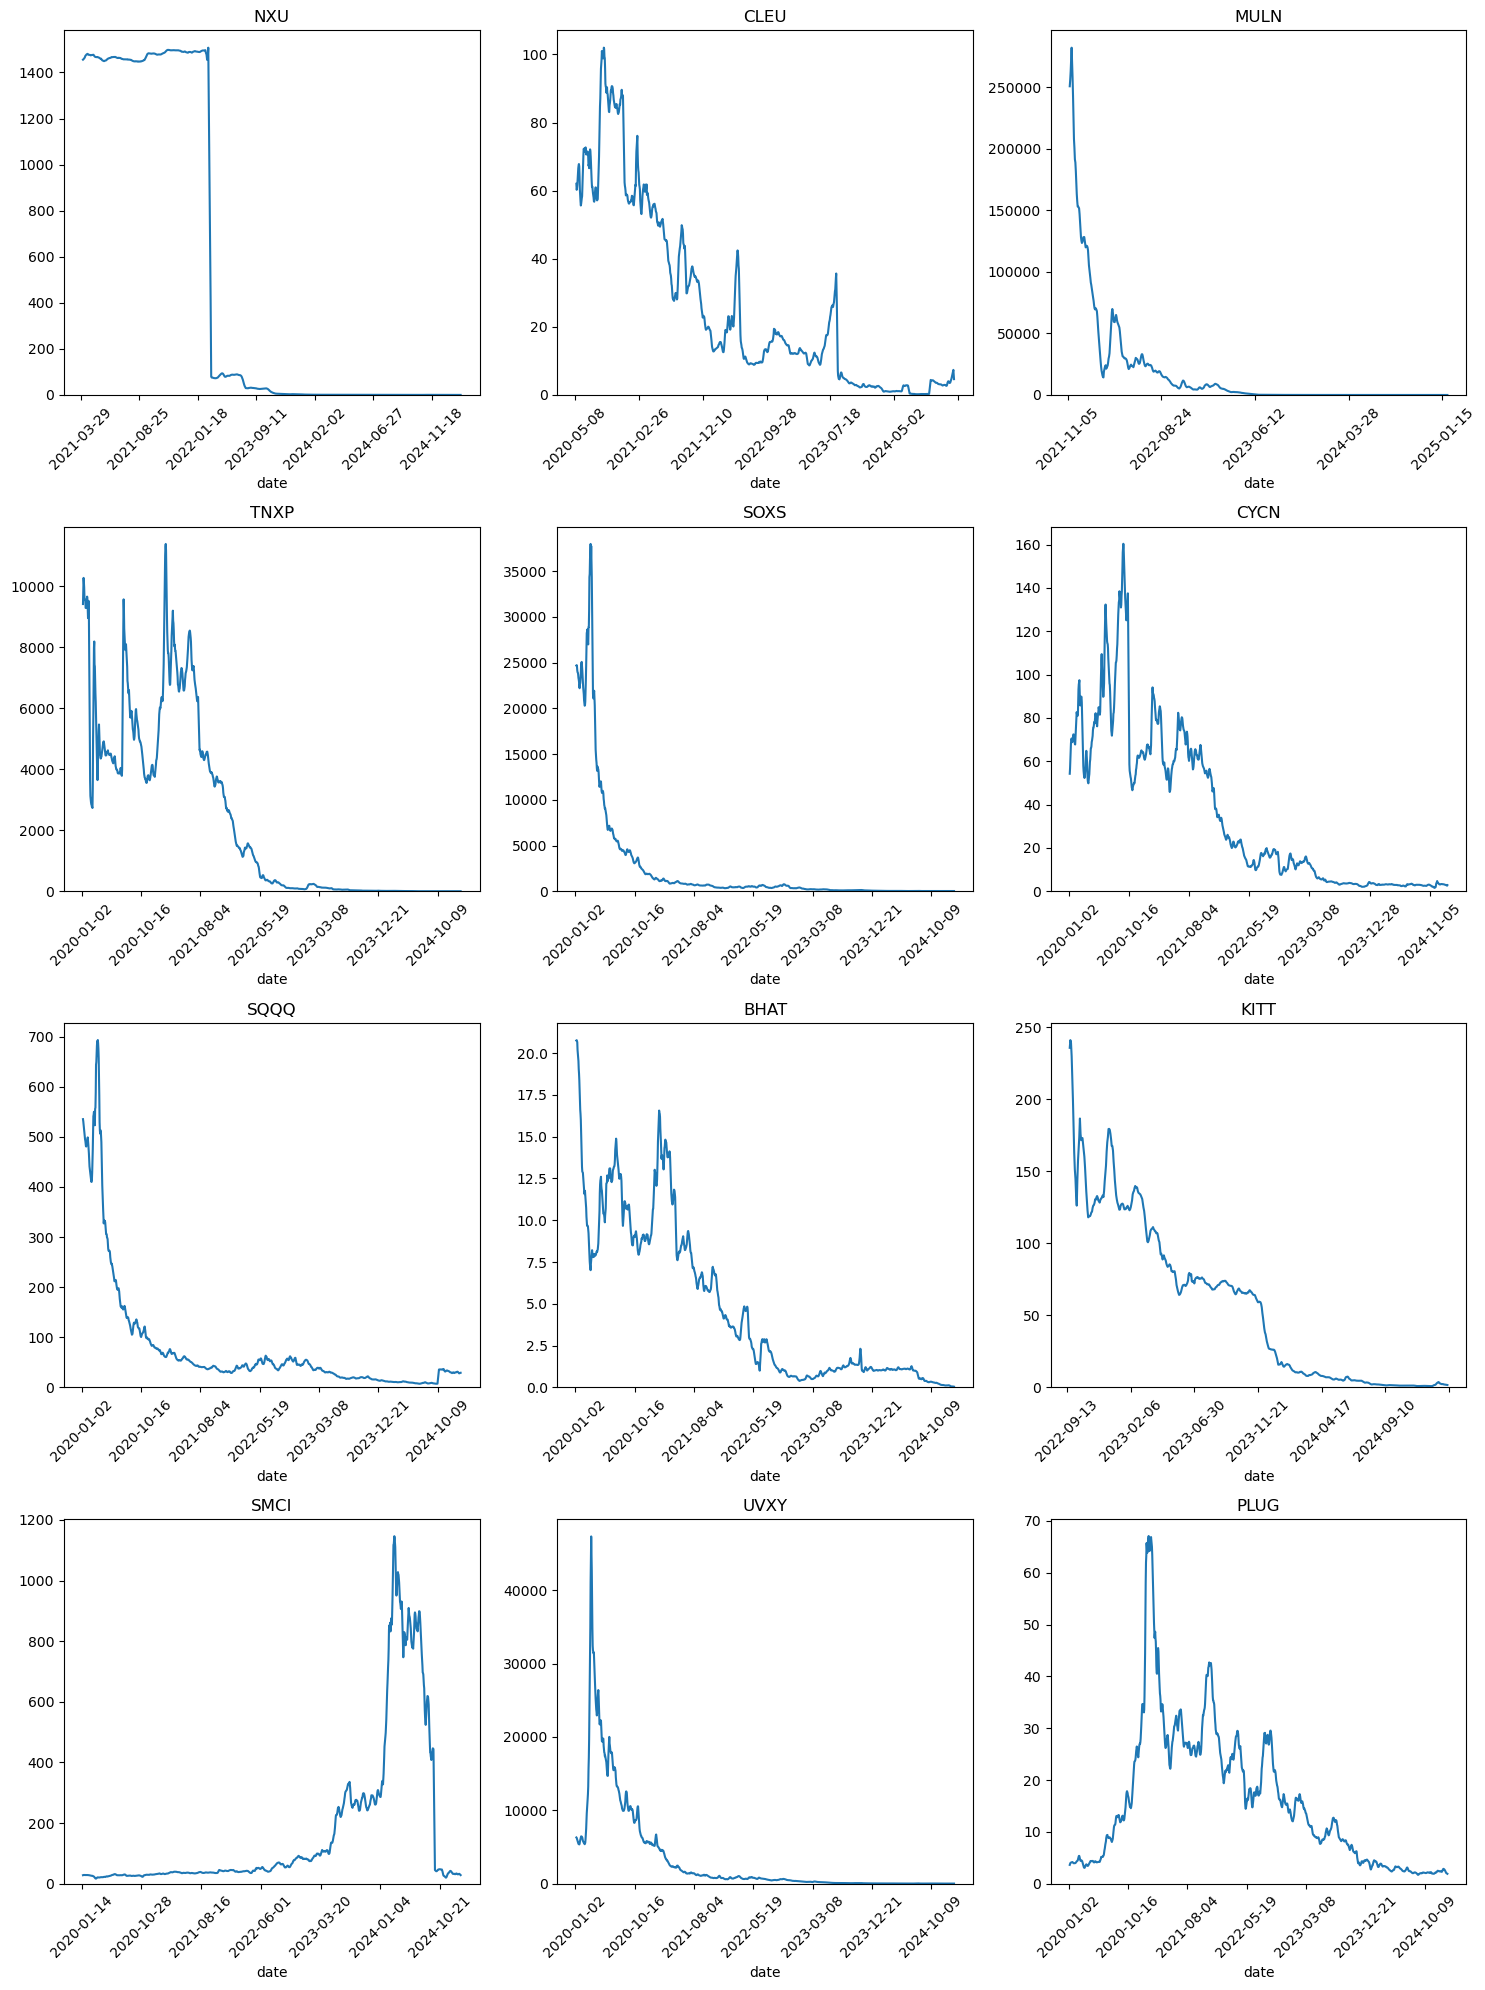

In [11]:
plot_list(df, tlist)

In [226]:
get_quantiles(now['volume'], index=True) 

array([97.9 ,  7.22, 71.74, ..., 78.1 , 88.88, 67.54])

In [239]:
now['mdiff_vol'] = add_score(now, ['mdiff', 'volume'])

In [128]:
pypl = df[df.ticker=='PYPL']

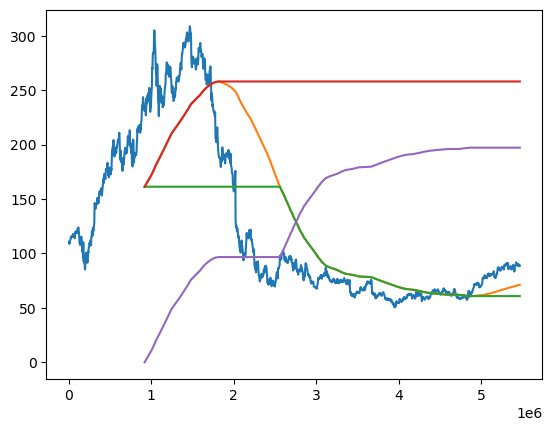

In [129]:
plt.plot(pypl.close)
plt.plot(pypl.ma252)
plt.plot(pypl.malow)
plt.plot(pypl.mahigh)
plt.plot(pypl.madiff)

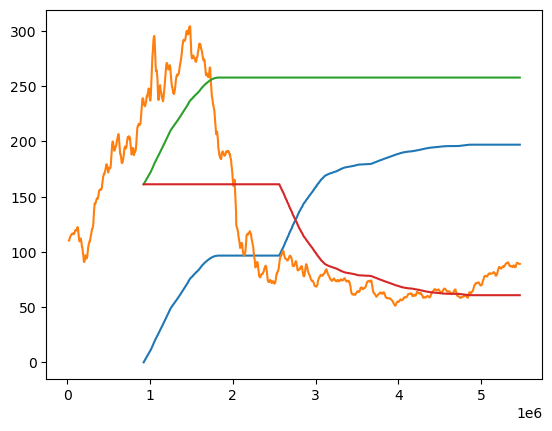

In [108]:
plt.plot(get_ma_diff(pypl.close, 252))
plt.plot(talib.SMA(pypl.close, 5))
plt.plot(pd.Series(talib.SMA(pypl.close, 252)).cummax())
plt.plot(pd.Series(talib.SMA(pypl.close, 252)).cummin())

In [54]:
df['distance30'] = df.groupby('ticker')['close'].transform(lambda x: getdistance(x, n=30))
df['distance90'] = df.groupby('ticker')['close'].transform(lambda x: getdistance(x, n=90))
df['distance180'] = df.groupby('ticker')['close'].transform(lambda x: getdistance(x, n=180))

In [38]:
a = ['VIAV',
 'REBN',
 'BEN',
 'SRTS',
 'TFSL',
 'FLG',
 'TEAM',
 'PMT',
 'SOPA',
 'GROY',
 'OSK',
 'RBC']

In [51]:
df[df.ticker=='REBN']

,ticker,date,close,volume,distance
659509,REBN,2022-08-12,38.40,5.701435e+05,NaN
661821,REBN,2022-08-15,31.92,1.180090e+05,NaN
665398,REBN,2022-08-16,32.80,3.204169e+05,NaN
670501,REBN,2022-08-17,33.92,8.194638e+04,NaN
675041,REBN,2022-08-18,31.76,7.058925e+04,NaN
...,...,...,...,...,...
3514247,REBN,2025-01-27,1.44,3.237800e+04,-0.194049
3522101,REBN,2025-01-28,1.70,1.352020e+05,1.145949
3523986,REBN,2025-01-29,2.29,3.325433e+06,3.335654
3530357,REBN,2025-01-30,2.03,5.216380e+05,1.993775


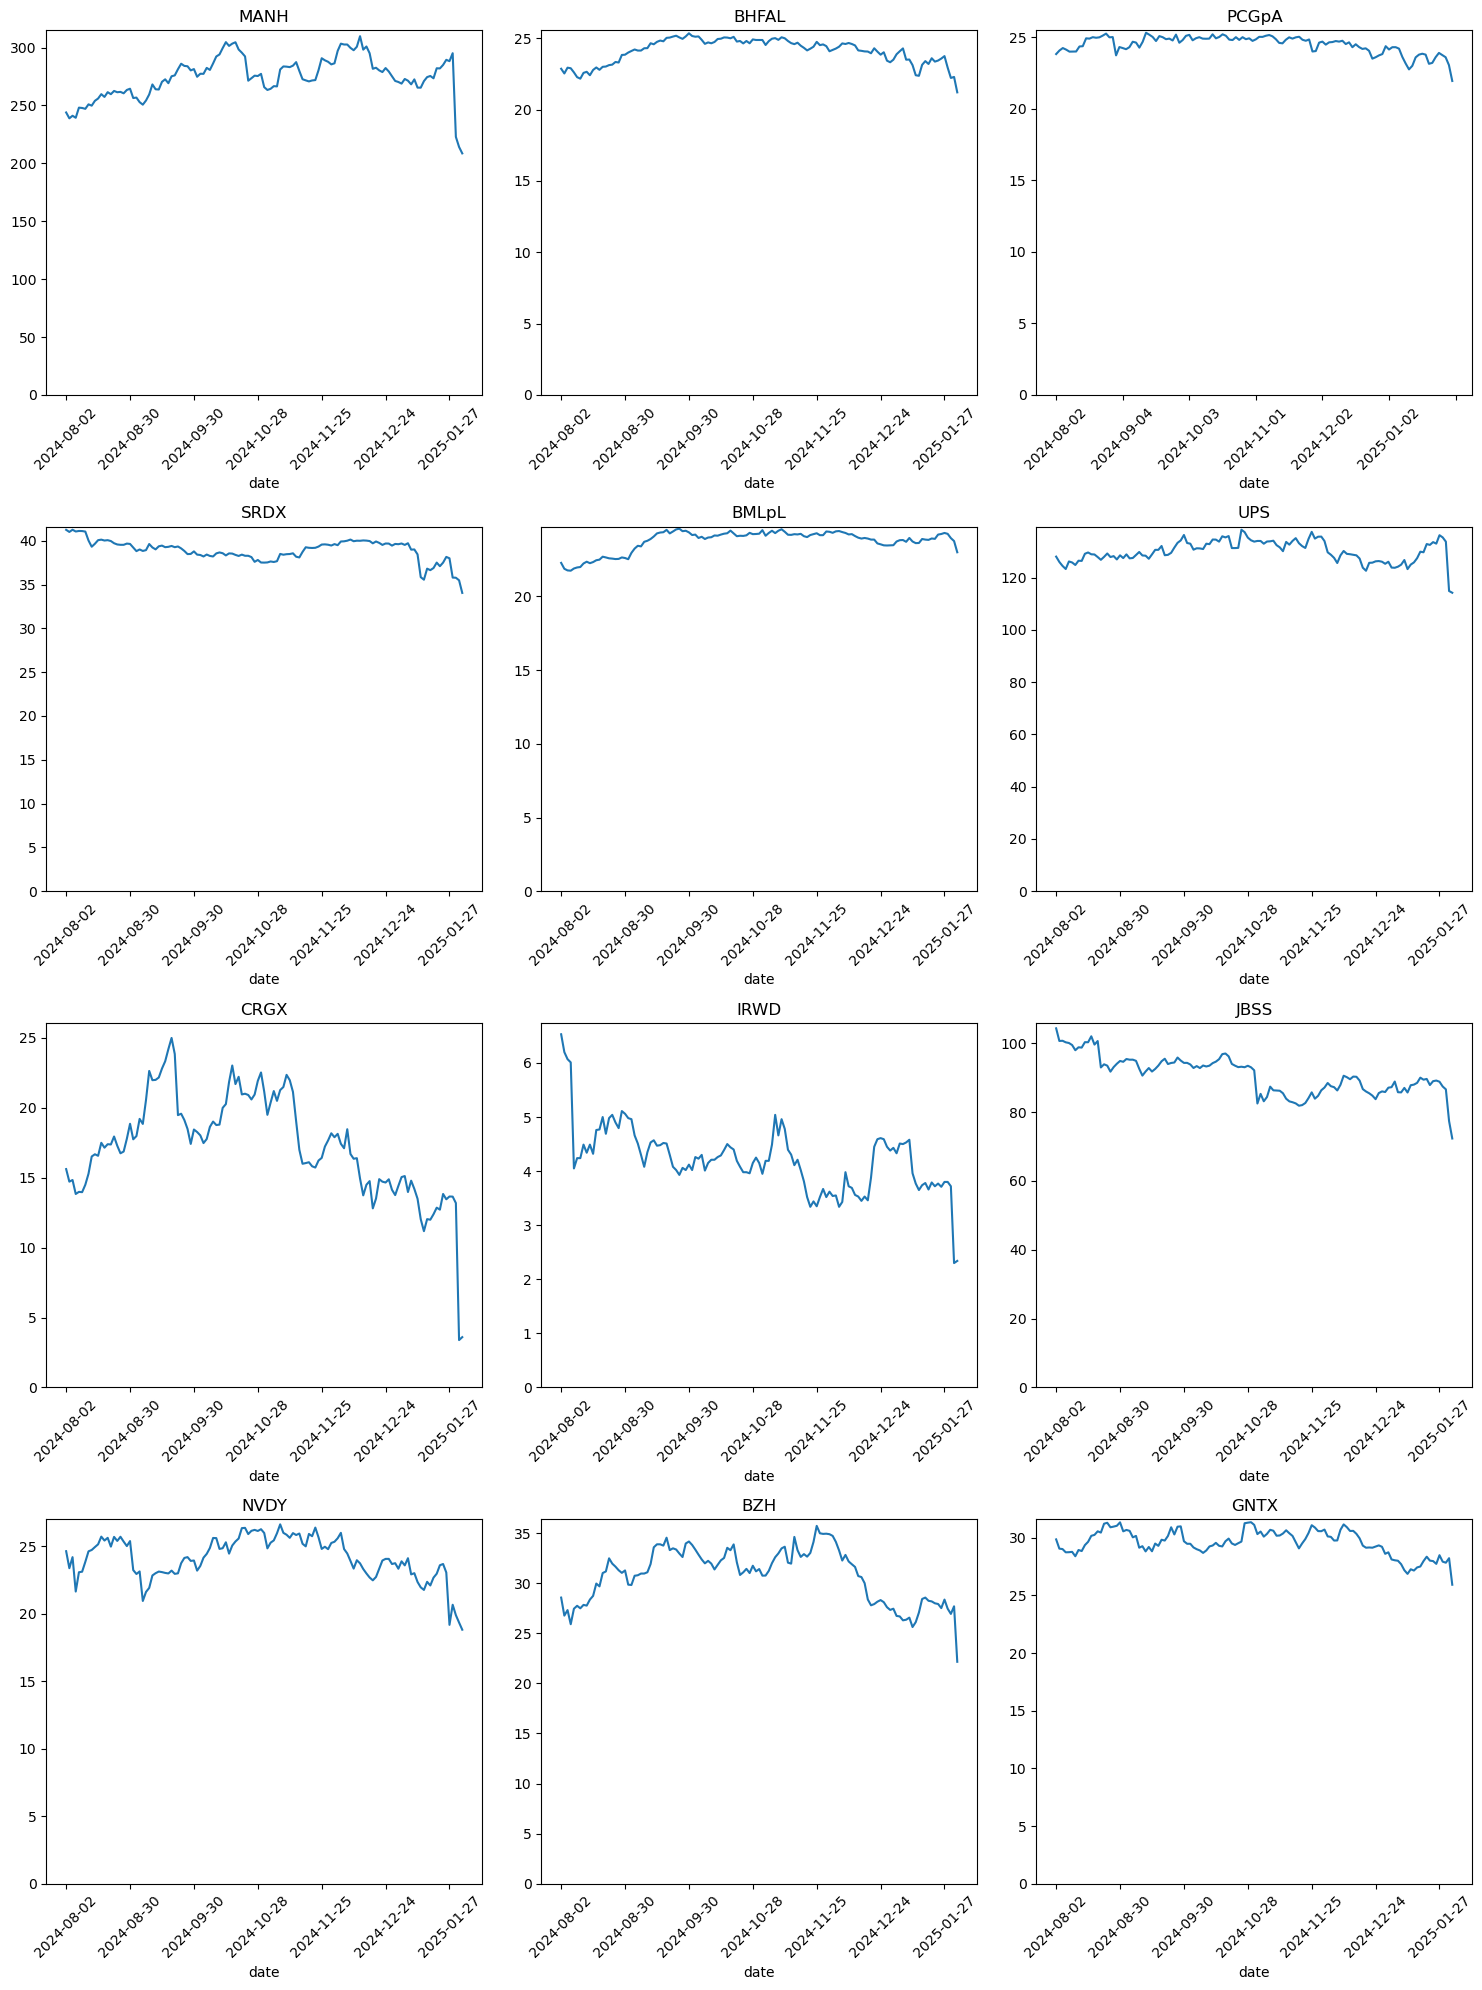

In [58]:
plot_by_var(df[df.date>'2024-08-01'], 'distance90', 'min')

In [25]:
now = df[df.date==df.date.max()]

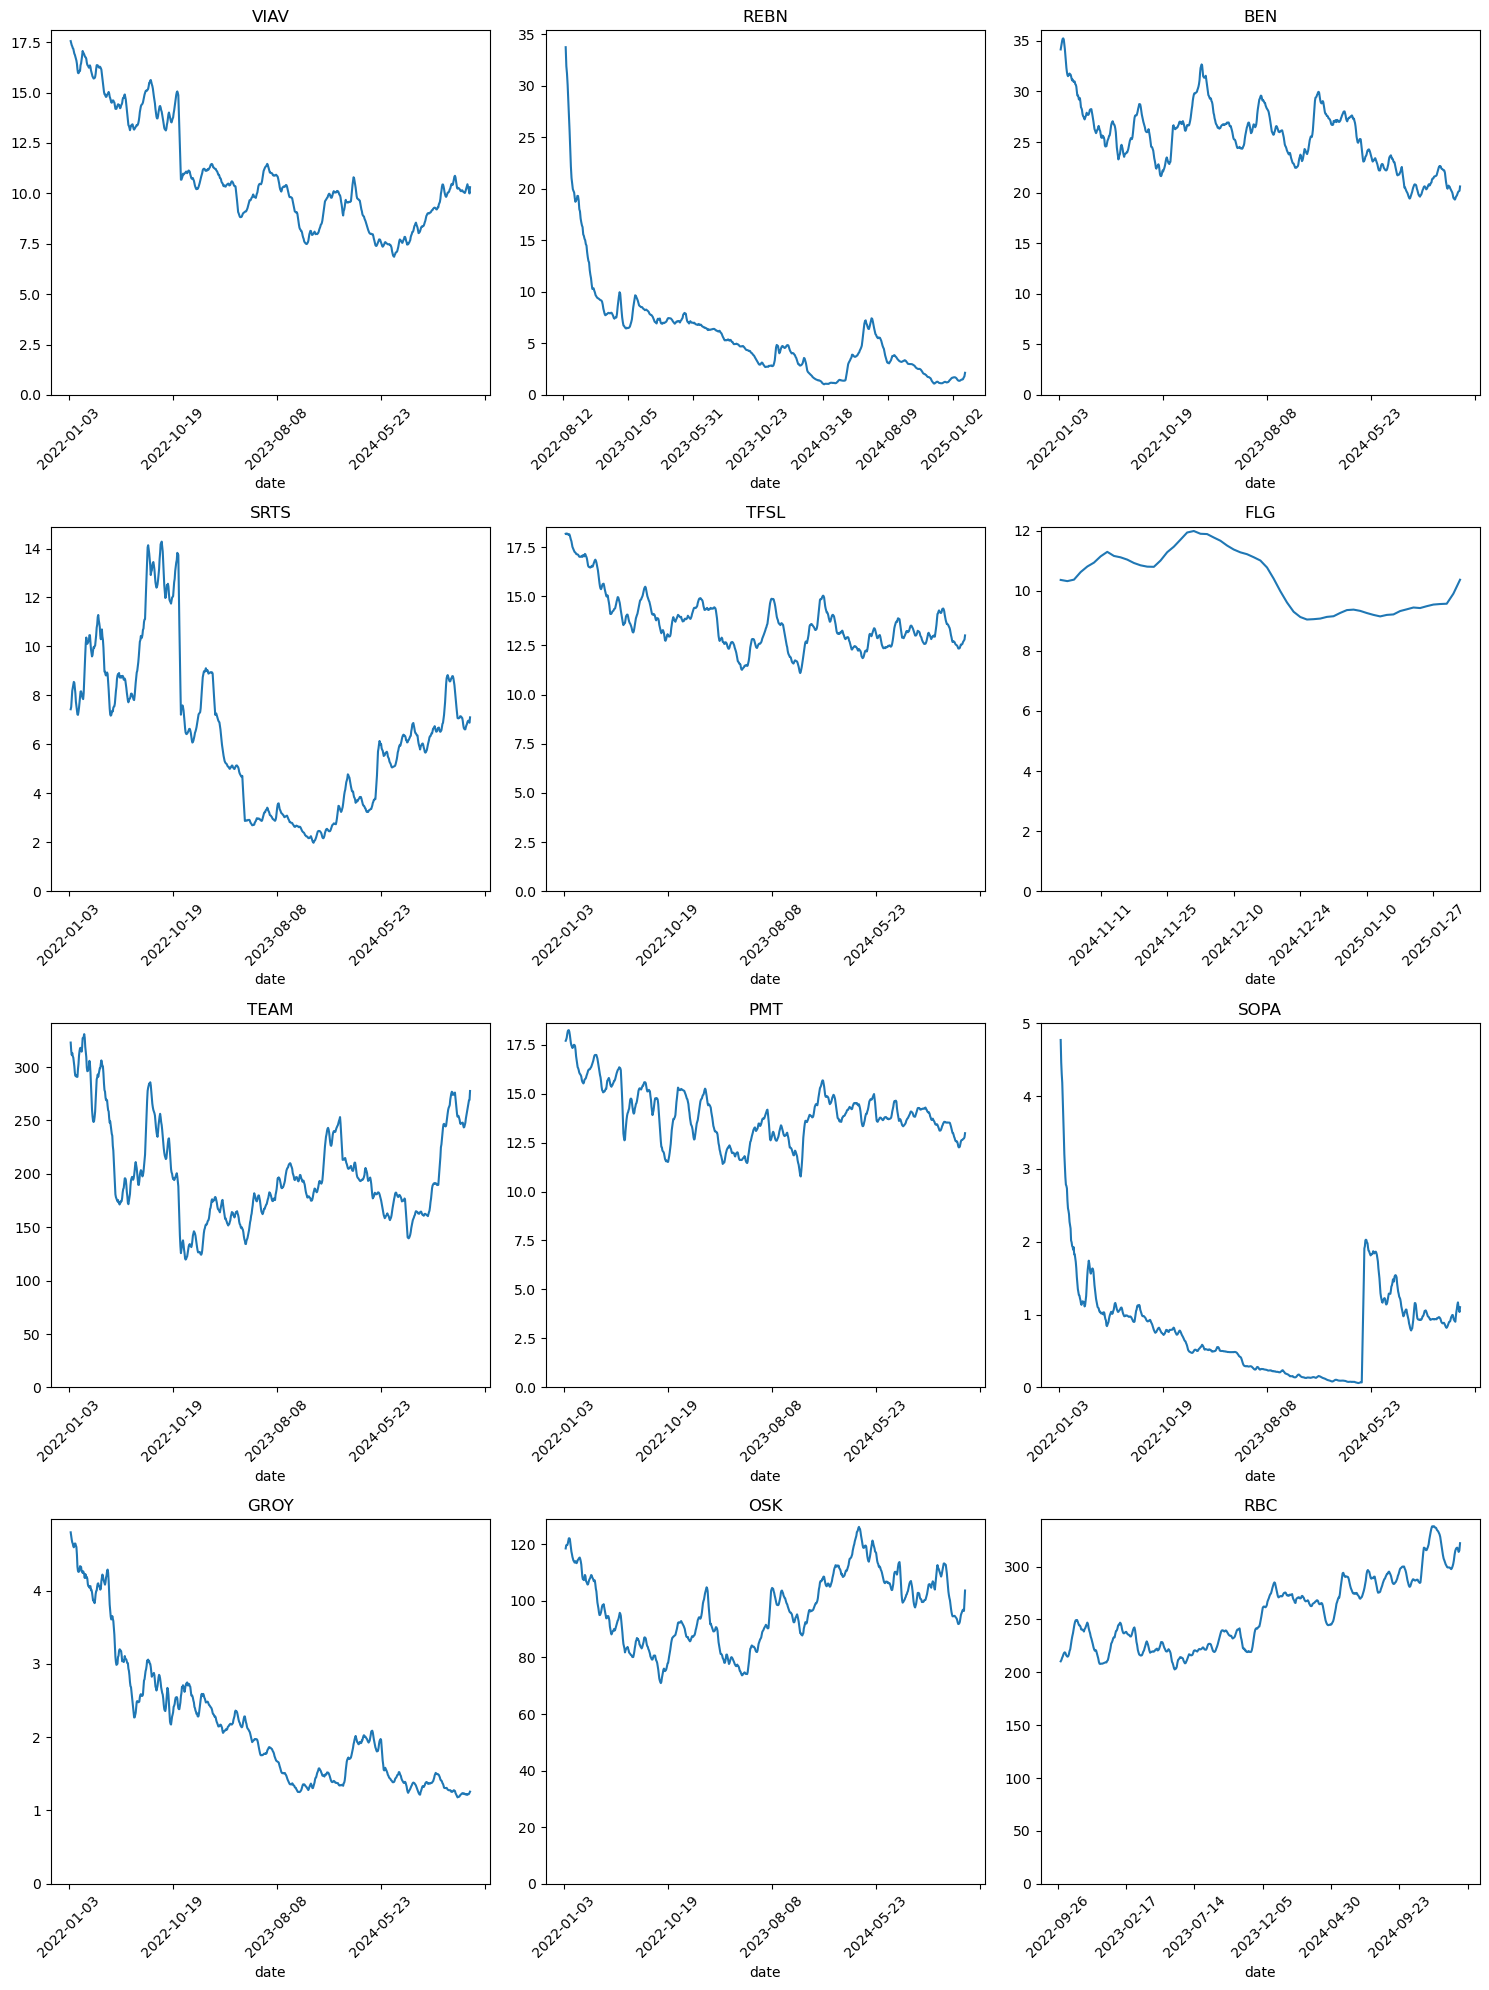

In [59]:
plot_list(df, ['VIAV',
 'REBN',
 'BEN',
 'SRTS',
 'TFSL',
 'FLG',
 'TEAM',
 'PMT',
 'SOPA',
 'GROY',
 'OSK',
 'RBC'])

In [28]:
list(now.nlargest(12, 'distance').ticker)

['VIAV',
 'REBN',
 'BEN',
 'SRTS',
 'TFSL',
 'FLG',
 'TEAM',
 'PMT',
 'SOPA',
 'GROY',
 'OSK',
 'RBC']

In [6]:
df['low'] = n_week_low(df, 52)

In [7]:
df['high'] = n_week_high(df, 52)

In [8]:
df['lowdistance'] = df['close'] / df['low']

In [9]:
df['highdistance'] = df['high'] / df['close']

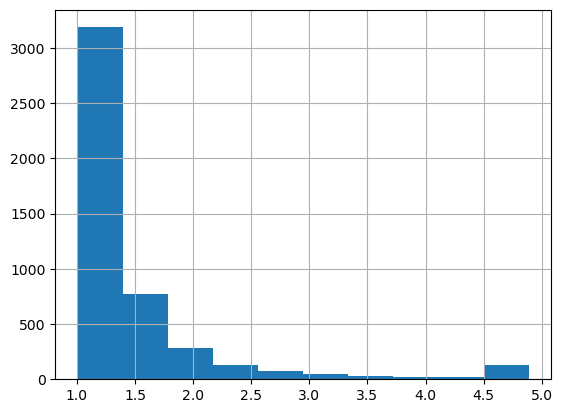

In [11]:
hist(df, 'lowdistance', 1, latest=True)

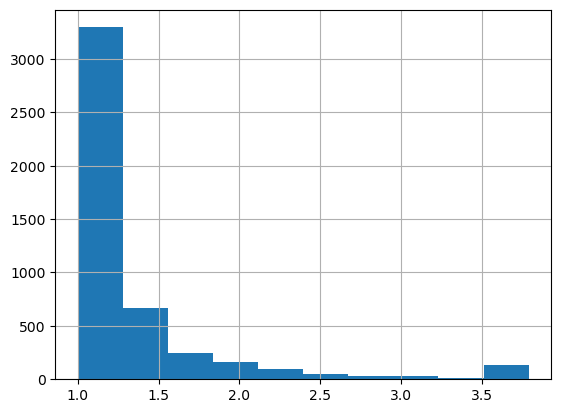

In [179]:
hist(df, 'highdistance', 0.99, latest=True)

In [173]:
df['ldlog'] = np.log(df.lowdistance)
df['hdlog'] = np.log(df.highdistance)

In [190]:
now.shape

(5000, 12)

In [194]:
now2 = remove_outliers(now, ['low', 'high'])

[0.14794600000000036, 648.6324000000009]
[2.24, 641.2039999999988]


<Axes: xlabel='lowdistance', ylabel='highdistance'>

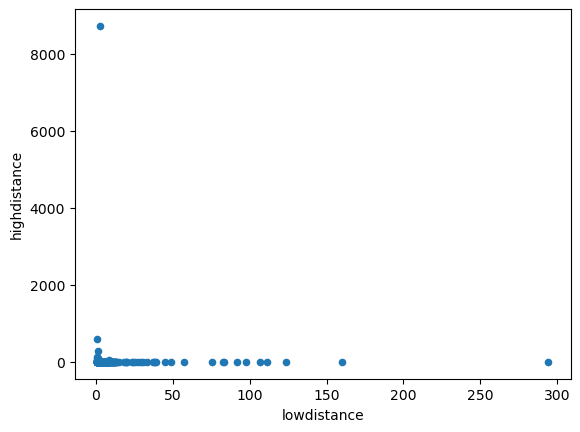

In [201]:
remove_max(now, 'lowdistance').plot.scatter(x='lowdistance', y='highdistance')

<Axes: xlabel='lowdistance', ylabel='highdistance'>

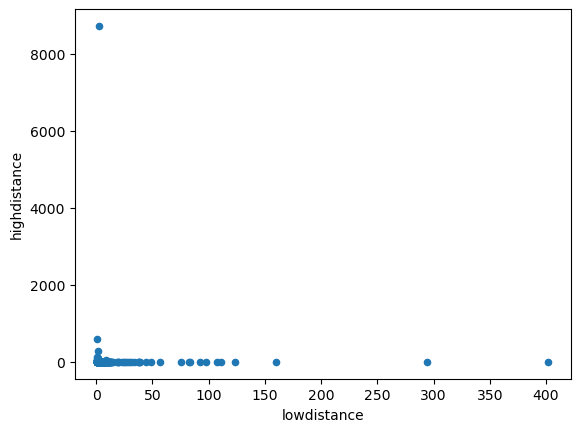

In [199]:
now.plot.scatter(x='lowdistance', y='highdistance')